# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | callao
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | along
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | tete
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | bandar-e genaveh
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | northam
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | skovorodino
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | jalasjarvi
Processing Record 21 of Set 1 | arraias
Processing Record 22 of Set 1 | grytviken
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,40.51,93,75,6.91,US,1696232513
1,callao,-12.0667,-77.1500,66.72,82,100,13.80,PE,1696232513
2,vilyuchinsk,52.9306,158.4028,47.93,94,100,17.72,RU,1696232513
3,adamstown,-25.0660,-130.1015,68.63,78,30,24.29,PN,1696232513
4,along,28.1667,94.7667,82.47,89,78,1.81,IN,1696232514


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,40.51,93,75,6.91,US,1696232513
1,callao,-12.0667,-77.1500,66.72,82,100,13.80,PE,1696232513
2,vilyuchinsk,52.9306,158.4028,47.93,94,100,17.72,RU,1696232513
3,adamstown,-25.0660,-130.1015,68.63,78,30,24.29,PN,1696232513
4,along,28.1667,94.7667,82.47,89,78,1.81,IN,1696232514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

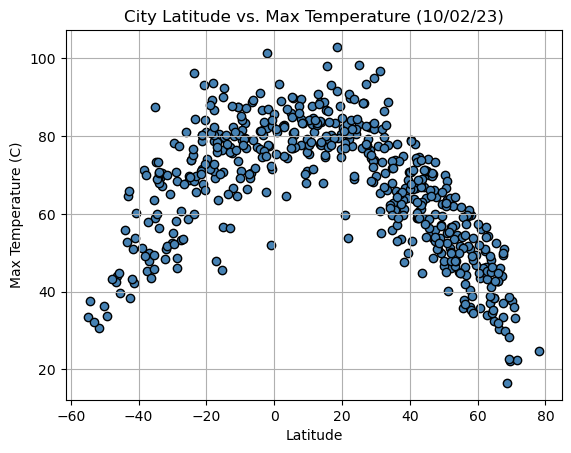

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")
    

# Incorporate the other graph properties 
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

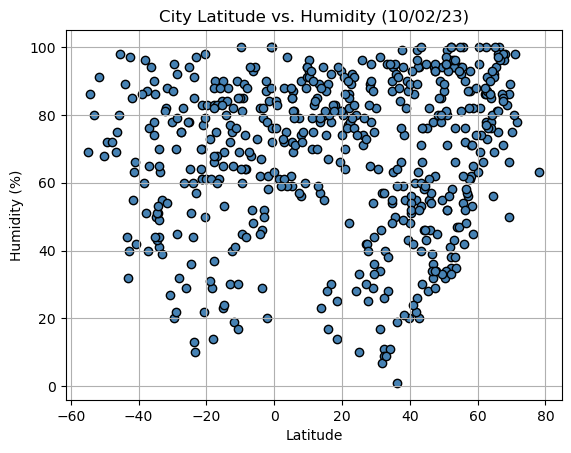

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

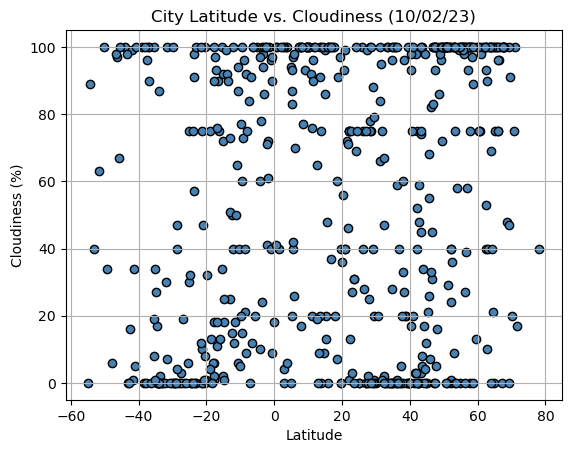

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

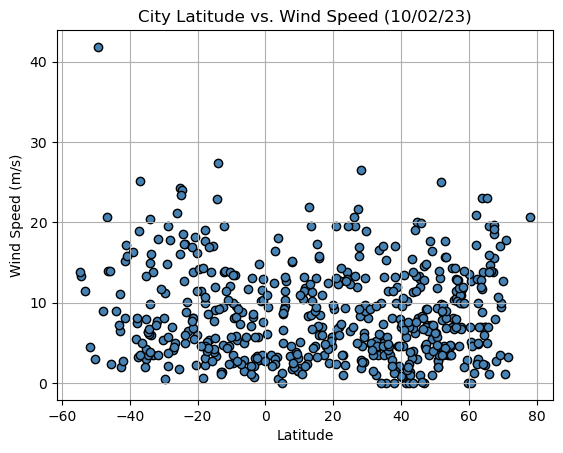

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-value is: {r_value}")



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,40.51,93,75,6.91,US,1696232513
2,vilyuchinsk,52.9306,158.4028,47.93,94,100,17.72,RU,1696232513
4,along,28.1667,94.7667,82.47,89,78,1.81,IN,1696232514
6,iqaluit,63.7506,-68.5145,37.13,86,100,6.91,CA,1696232514
12,badger,64.8000,-147.5333,38.35,92,100,6.91,US,1696232514


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,callao,-12.0667,-77.1500,66.72,82,100,13.80,PE,1696232513
3,adamstown,-25.0660,-130.1015,68.63,78,30,24.29,PN,1696232513
5,geraldton,-28.7667,114.6000,68.41,45,40,19.57,AU,1696232514
7,waitangi,-43.9535,-176.5597,55.81,89,100,8.99,NZ,1696232514
8,puerto natales,-51.7236,-72.4875,30.78,91,63,4.45,CL,1696232514


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8500123453965659


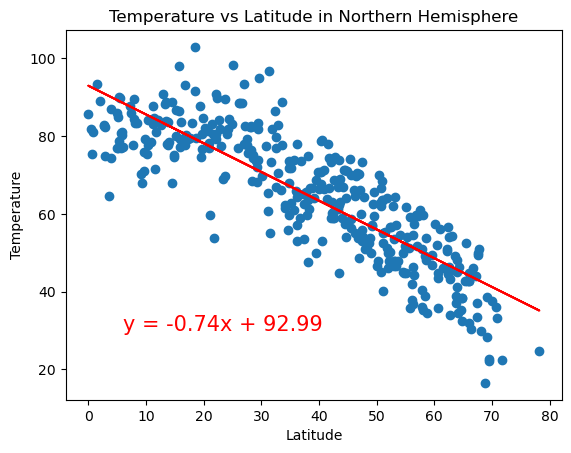

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values,"Max Temp",(6,30))
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude in Northern Hemisphere")
plt.show()

The r-value is: 0.7149715556604731


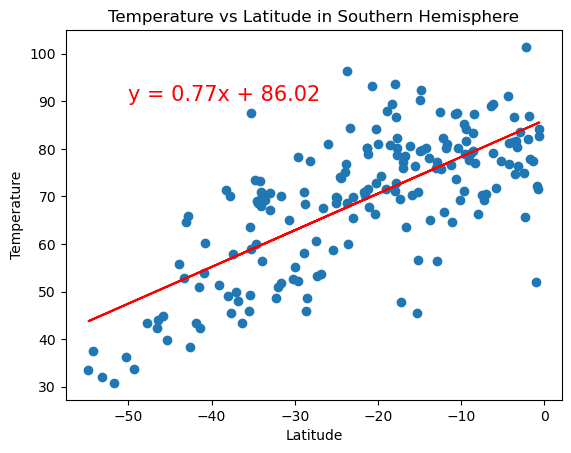

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values,"Max Temp",(-50,90))
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**  
The northern hemisphere has a negative correlation between temperature and latitude.  The southern hemisphere has a positive correlation between temperature and latitude.  This means that as you move away from the equator, the temperature decreases in the northern hemisphere and increases in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06029979999818938


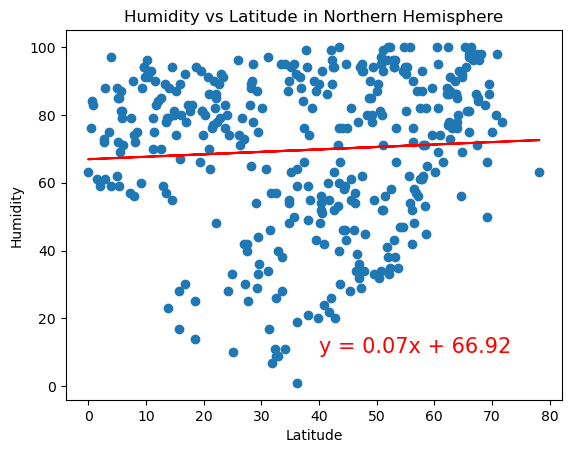

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values,"Humidity",(40,10))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.show()


The r-value is: 0.01228284341273945


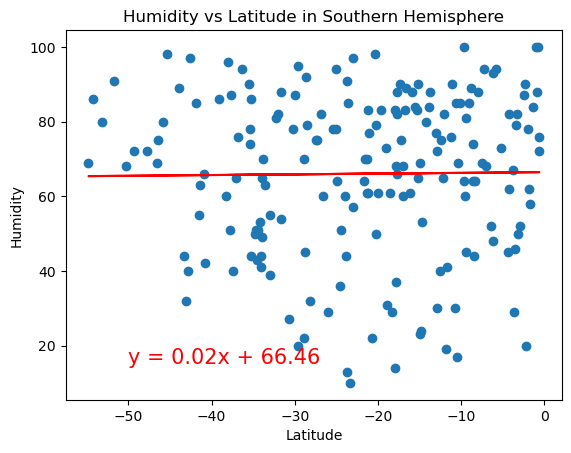

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values,"Humidity",(-50,15))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 
There is no correlation between humidity and latitude in the northern hemisphere.  There is a weak positive correlation between humidity and latitude in the southern hemisphere.  This means that as you move away from the equator, the humidity increases in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09475008890895845


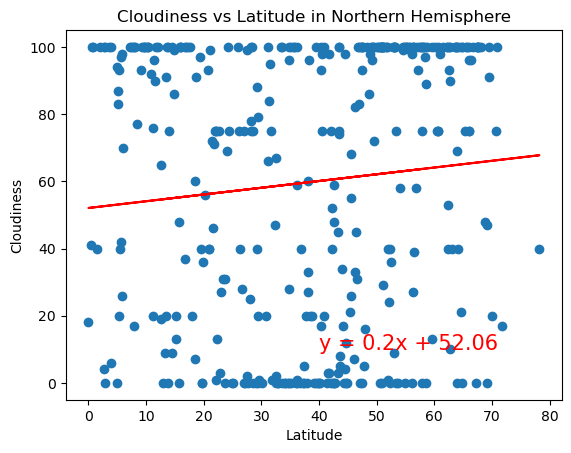

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values,"Cloudiness",(40,10))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.show()

The r-value is: 0.19196029763263867


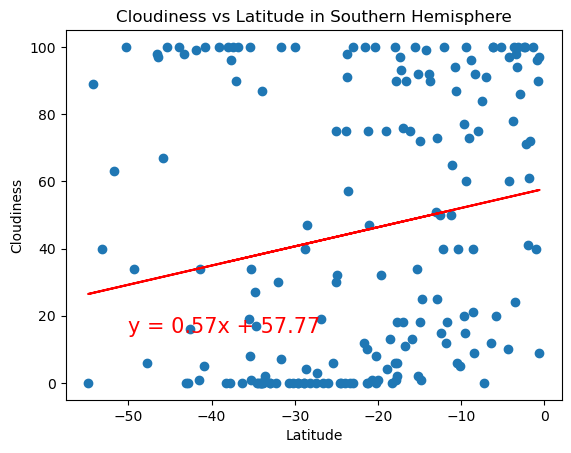

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values,"Cloudiness",(-50,15))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 
There is no correlation between cloudiness and latitude in the northern hemisphere.  There is a weak positive correlation between cloudiness and latitude in the southern hemisphere.  This means that as you move away from the equator, the cloudiness increases in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10463425444733575


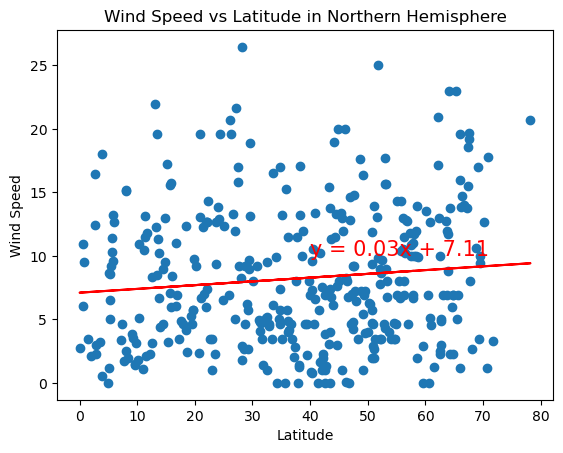

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values,"Wind Speed",(40,10))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in Northern Hemisphere")
plt.show()


The r-value is: -0.20214593696941846


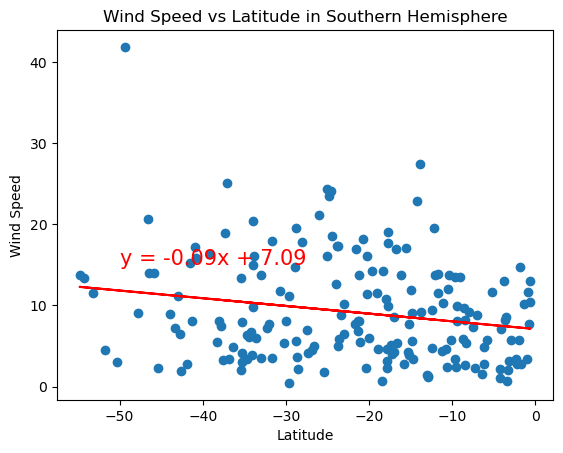

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values,"Wind Speed",(-50,15))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in Southern Hemisphere")
plt.show()
    

**Discussion about the linear relationship:** 
There is no correlation between wind speed and latitude in the northern hemisphere.  There is a weak negative correlation between wind speed and latitude in the southern hemisphere.  This means that as you move away from the equator, the wind speed decreases in the southern hemisphere.